# Homework 2: Iteration and Simulations

Welcome to HW 2! 

We will go over [iteration](https://www.inferentialthinking.com/chapters/09/2/Iteration.html) and [simulations](https://www.inferentialthinking.com/chapters/09/3/Simulation.html).

In this assignment you will be using
* Boolean operators 
* `if` / `else` / `elif` conditional statements
* `np.random.choice(array_name)`
* functions that you defined yourself
* `apply` method for tables
* iterating over arrays using `for` loops
* simulation steps to compute different statistics
* `in` and `not in` operators to check for presence of values
* `np.append` method to add values to an array

First, set up the tests and imports by running the cell below.

In [1]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Don't change this cell; just run it. 
import otter
grader = otter.Notebook()

## 1. For Loops
Using a `for` statement, we can perform a task multiple times. This is known as iteration.

One use of iteration is to loop through a set of values. For instance, we can print out all of the colors of the rainbow (and capitalize each word while we are at it!).

In [2]:
rainbow = make_array("red", "orange", "yellow", "green", "blue", "indigo", "violet")

for color in rainbow:
    print(color.title())

Red
Orange
Yellow
Green
Blue
Indigo
Violet


We can see that the indented part of the `for` loop, known as the body, is executed once for each item in `rainbow`. The name `color` is assigned to the next value in `rainbow` at the start of each iteration. Note that the name `color` is arbitrary; we could easily have named it something else. The important thing is we stay consistent throughout the `for` loop. 

```
BEGIN QUESTION
name: q10
points: 1
manual: true
```

In [3]:
for another_name in rainbow:
    # please print out the colors below
    print(another_name) # SOLUTION

red
orange
yellow
green
blue
indigo
violet


In general, however, we would like the variable name to be somewhat informative. 

---

Another way in which we can retrieve every element in our array is by using the **array indexing**. We will need to generate a sequence of the array index values that the `for` loop will use to get the requested elements.

Usually, the structure of that loop will involve using `np.arange` and the `len` of the array. If we don't want to start from the beginning and/or we don't want every single element in the order that they appear in the array, we now have more flexibility in how we structure the range, which will be used by the loop.

**Question 1.1.1.** Let's do an example of summing all the elements in an array. Replace the ellipsis with the code according to the instructions in the cell below. 

*Note*: Remember that you can verify your answer by looking at the contents of your array and verifying your code's result.

```
BEGIN QUESTION
name: q111
points: 2
manual: false
```

In [4]:
# Create an array such that it contains 1, 3, 5, 7, 9
my_array = np.arange(1, 10, 2) # SOLUTION

# my_sum is initialized to 0. It will be incremented/increased inside the for loop.
my_sum = 0 

for i in np.arange(len(my_array)):
    # Get the i-th element in the array here
    my_sum = my_sum + my_array[i] # SOLUTION   
    
my_sum

25

In [5]:
# HIDDEN TEST
my_sum == 25

True

In [6]:
# HIDDEN TEST
my_array[3] == my_array[1]*2 + 1

True

**Question 1.1.2.** Let's now use the same array, but this time we'll print and sum _every other element_ in this array, starting with the _second_ element. Store the result in `another_sum`. Replace the ellipsis with the code according to the instructions in the cell below. 

*Note*: Remember that you can verify your answer by looking at the contents of your array and verifying your code's result.

```
BEGIN QUESTION
name: q112
points: 2
manual: false
```

In [7]:
another_sum = 0 

# BEGIN SOLUTION
for i in np.arange(1, len(my_array), 2):
    # Get the i-th element in the array here
    another_sum = another_sum + my_array[i]

# END SOLUTION

another_sum

10

In [8]:
# HIDDEN TEST
another_sum == 10

True

**Question 1.1.3.** Let's now create a new array that stores the years between 1990 and 2030 (inclusive of both). If the year is divisible by 3, replace its value in the array with a 0.

*Hint*: Remember how modulo `%` works.

```
BEGIN QUESTION
name: q113
points: 2
manual: false
```

In [9]:
years = np.arange(1990, 2031) # SOLUTION

# BEGIN SOLUTION
for i in np.arange(1, len(years)):
    if years[i] % 3 == 0:
    # Get the i-th element in the array here
        years[i] = 0

# END SOLUTION

In [10]:
# HIDDEN TEST
len(years) == 41

True

In [11]:
# HIDDEN TEST
years[0] == 1990 and years[-1] == 2030

True

In [12]:
# HIDDEN TEST
sum(years) == 56280

True

### *Pride and Prejudice*

We have a few questions asking you to analyze the text in the novel [*Pride and Prejudice*](https://en.wikipedia.org/wiki/Pride_and_Prejudice).

**Question 1.2.** In the following cell, we've loaded the text of _Pride and Prejudice_ by Jane Austen (from the [Gutenberg project](www.gutenberg.org)), split it into individual words, and stored these words in an array `p_and_p_words`. Using a `for` loop, assign `longer_than_five` to the number of words in the novel that are more than 5 letters long.

*Hint*: You can find the number of letters in a word with the `len` function.

```
BEGIN QUESTION
name: q12
points: 2
manual: false
```

In [13]:
austen_string = open('Austen_PrideAndPrejudice.txt', encoding='utf-8').read()
p_and_p_words = np.array(austen_string.split())

longer_than_five = 0 # SOLUTION

# a for loop would be useful here
# BEGIN SOLUTION
for w in p_and_p_words:
    if len(w) > 5:
        longer_than_five += 1
# END SOLUTION

longer_than_five

35453

In [14]:
# HIDDEN TEST
longer_than_five == 35453

True

**Question 1.3.** In this question, we ask you to count the number of unique words in *Pride and Prejudice*. To do this, first of all, you need to maintain an array of unique words you have already seen, which we will call `seen_words`. Initially this array is empty, because you have not seen anything yet. As you loop through every word in the array `p_and_p_word`, if the word has never appeared before (which means you cannot find it `seen_words`), you add it into `seen_words`.

To determine whether an item is in an array, we use the `in` operator. Below are different ways that you can structure your code. Play around with the values to make sure you understand how the code works.

In [15]:
fruits = make_array('orange', 'banana', 'watermelon')
if 'apple' in fruits:
    print('apple is in the array')
else:
    print('apple is not in the array')
    
if 'kiwi' not in fruits:
    print('banana is not in the array')

apple is not in the array
banana is not in the array


To add an item into an array, we use the method `np.append`.

In [16]:
old_array = make_array('orange', 'banana', 'watermelon')
new_array = np.append(old_array, 'apple')
new_array

array(['orange', 'banana', 'watermelon', 'apple'], dtype='<U10')

Now try to count the number of unique words in *Pride and Prejudice*! Note that it will take a while for the code to run completely. Wait at least a minute for the code to run!

```
BEGIN QUESTION
name: q13
points: 2
manual: false
```

In [17]:
num_unique_words = 0 # SOLUTION
seen_words = make_array() # SOLUTION

# here is a forloop
# BEGIN SOLUTION
for w in p_and_p_words:
    if w not in seen_words:
        num_unique_words += 1
        seen_words = np.append(seen_words,w)

# END SOLUTION
num_unique_words

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


12943

In [18]:
# HIDDEN TEST
num_unique_words == 12943

True

**Question 1.4.** Have you ever wondered how many times letter 'q' has occured in *Pride and Prejudice*? Well, wonder no more! Count the number of times the letter 'q' appears in *Pride and Prejudice*.

*Hint:* Firstly, you need to know how to count the letter 'q' in an arbitrary string. (The next cell tells you how it can be done.) Then, you will need to do this for every word in `p_and_p_words`.

In [19]:
# In this cell, we count the number of times the letter 'p' appears in the word "appropriate".
my_word = "appropriate" # a sample word
num_p_in_my_word = 0 # a counter that keeps a running sum

for letter in my_word: #for each letter in the given word
    if letter == 'p':
        num_p_in_my_word = num_p_in_my_word + 1 # update the counter/sum
num_p_in_my_word        

3

Now, try to count the number of times the letter 'q' appears in Pride and Prejudice!

```
BEGIN QUESTION
name: q14
points: 2
manual: false
```

In [20]:
num_q = 0 # SOLUTION

#write foor loops below
# BEGIN SOLUTION
for w in p_and_p_words:
    for letter in w:
        if letter == 'q':
            num_q += 1
# END SOLUTION
num_q

627

In [21]:
# HIDDEN TEST
num_q == 627

True

**Question 1.5.** Now suppose we want to count the number of times any arbitrary letter in the alphabet appears in *Pride and Prejudice*. Can we write a function that counts the number of occurrences of a given letter in *Pride and Prejudice*? 

*Hint:* Test your function by seeing if you get the same result when you count the number of 'q's.

```
BEGIN QUESTION
name: q151
points: 2
manual: true
```

In [22]:
def find_num_letter(letter):
    
    # BEGIN SOLUTION
    num_letter = 0
    for w in p_and_p_words:
        for l in w:
            if l == letter:
                num_letter += 1
    return num_letter
    # END SOLUTION
    
find_num_letter("q")

627

We can test and play with our function `find_num_letter` some more below using the interactive widget.

In [23]:
# Run this cell, but please don't change it.
# This package is for interactive widget, you're not required to learn it
from ipywidgets import widgets, interact

_ = interact(find_num_letter, letter=widgets.Text())

interactive(children=(Text(value='', description='letter'), Output()), _dom_classes=('widget-interact',))

Which letter is the most common? Which letter is the least common? Assign the values to string `most_common_letter` and `least_common_letter`.


```
BEGIN QUESTION
name: q152
points: 2
manual: false
```

In [24]:
most_common_letter = 'e'# SOLUTION
least_common_letter = 'j'# SOLUTION

In [25]:
# HIDDEN TEST
(most_common_letter,least_common_letter) == ('e', 'j')

True

## 2. Simulation

Here's an example to help you understand how to simulate using interations. we'll simulate drawing different suits from a deck of cards. Drawing different suits from a deck of cards means picking a card of a specific shape (suit) from the stack (deck) of cards. For example, if we draw a ♤3, we say we have picked a suit ♤.

*Note:* The four suits are Spade(♤), heart(♡), club(♧), diamond(♢). 

```
BEGIN QUESTION
name: q151
points: 2
manual: false
```

In [26]:
suits = make_array("♤", "♡", "♢", "♧")

# below is the array to keep track of the suits drawed in each round
draws = make_array() #SOLUTION

# we repeat the experiment 6 times
repetitions = 6

for i in np.arange(repetitions):
    #draw a card and append the suit into draws 
    draws = np.append(draws, np.random.choice(suits))  # SOLUTION

draws

array(['♡', '♤', '♡', '♡', '♤', '♢'], dtype='<U32')

In the example above, the `for` loop appends a random draw to the `draws` array for every number in `np.arange(repetitions)`. 

**Make sure that you understand what is happening with this example**, since it will be the basis for the solutions in the questions below.

> Here's a nice way to think of what we did above. We had a deck of 4 cards of different suits, we randomly drew one card, saw the suit, kept track of it in `draws` array, and put the card back into the deck. We repeated this for a total of 6 times without having to manually repeat code, thanks to the `for` loop. We simulated this experiment using a `for` loop. 

## Simulation Steps

Most simulations have the following steps: 
1. Figuring out **the big picture** of what we want to simulate
2. Deciding the possible values you can take in the experiment and **simulating one example** 
3. Deciding **how many times to run through the experiment** and **keeping track** of the total information of **each time you ran through the experiment**
4. Coding up the whole simulation!

**Question 2.1.** Sean is playing darts. His dartboard contains ten equal-sized zones with point values from 1 to 10. Write code that simulates his total score after 1000 dart tosses. Make sure to use a `for` loop.

*Hint:* There are a few steps to this problem (and most simulations): 
1. Figuring out **the big picture** of what we want to simulate (the total score after 1000 dart tosses)
2. Deciding the possible values you can take in the experiment (point values in this case) and **simulating one example** (throwing one dart)
3. Deciding **how many times to run through the experiment** (1000 tosses in our case) and **keeping track** of the total information of **each time you ran through the experiment** (the total score in this case)
4. Coding up the whole simulation!

```
BEGIN QUESTION
name: q21
points: 2
manual: false
```

In [27]:
possible_point_values = np.arange(1,11) # SOLUTION
tosses = 1000
total_score = 0 # SOLUTION

# a for loop would be useful here

# BEGIN SOLUTION
for i in np.arange(tosses):
    total_score += np.random.choice(possible_point_values)
# END SOLUTION


total_score

5467

In [28]:
# HIDDEN TEST
1000 <= total_score <= 10000

True

**Question 2.2.** Using simulation with 10,000 trials, assign `chance_of_all_different` to an estimate of the chance that if you pick three words from _Pride and Prejudice_ uniformly at random (with replacement), they all have *different lengths*. 

*Hint 1:* How do we compute chance? The chance of something happening is the number of instances where it happens divided by the number of total instances.

*Hint 2*: Remember that `!=` only checks for non-equality between two items, not three. However, you can use `!=` more than once in the same line. For example, `2 != 3 != 4` first checks for non-equality between `2` and `3`, then `3` and `4`, but NOT `2` and `4`.

*Hint 3*: `np.random.choice` can be used to randomly pick three words.

```
BEGIN QUESTION
name: q22
points: 2
manual: false
```

In [29]:
trials = 10000
different = 0 # SOLUTION

# write a for loop below
# BEGIN SOLUTION
for i in np.arange(trials):
    words = np.random.choice(p_and_p_words, 3)
    if len(words[0]) != len(words[1]) != len(words[2]) != len(words[0]):
        different += 1

# END SOLUTION
chance_of_all_different = different / trials # SOLUTION

chance_of_all_different

0.6323

In [30]:
# HIDDEN TEST
0.58 <= chance_of_all_different <= 0.68

True

## 3. Case Study: Examining the Therapeutic Touch

### What is the Therapeutic Touch

The Therapeutic Touch (TT) is the idea that everyone can feel the Human Energy Field (HEF) around individuals.  Those who practice TT have described different people's HEFs as "warm as Jell-O" and "tactile as taffy." 

TT was a popular technique used throughout the 20th century that was toted as a great way to bring balance to a person's health. Certain practitioners claim they have the ability to feel the HEF and can massage it in order to promote health and relaxation in individuals.

### Emily Rosa

[Emily Rosa](https://en.wikipedia.org/wiki/Emily_Rosa) was a 4th grade student who was very familiar with the world of TT, thanks to her parents, who were both medical practitioners and skeptics of TT.

For her 4th grade science fair project, Emily decided to test whether or not TT practitioners could truly interact with a person's HEF. She later went on to publish her work in TT, becoming the youngest person to have a research paper published in a peer reviewed medical journal.

### Emily's Experiment

Emily's experiment was clean, simple, and effective. Due to her parents' occupations in the medical field, she had wide access to people who claimed to be TT practitioners. 

Emily took 21 TT practitioners and used them for her science experiment. She would take a TT practitioner and ask them to extend their hands through a screen (which they can't see through). Emily would be on the other side and would flip a fair coin. Depending on how the coin landed, she would put out either her left hand or her right hand. The TT practitioner would then have to answer which hand Emily put out. If a pracitioner could truly interact with a person's HEF, it would be expected that they answered correctly. Overall, each practitioner performed such test 10 times.

**Question 3.1** If the ground truth is that TT practitioners couldn't interact with a person's HEF. i.e. the probability of the practitioner answers `left` or `right` with probability 0.5, regardless of how Emily toss the coin. 

Let's assume if the coin lands with head, Emily extends her left hand. Can you write a function to simulate such an experiment? Emily and practitioner both extend one hand and the function returns 1 if they extend the same hand, 0 otherwise.

```
BEGIN QUESTION
name: q31
points: 2
manual: false
```

In [31]:
hand_side = make_array('left','right')

def one_round_of_experiment():
    # BEGIN SOLUTION
    emily_hand =np.random.choice(hand_side) 
    practioner_hand = np.random.choice(hand_side) 
    if emily_hand == practioner_hand:
        return 1
    else:
        return 0
    # END SOLUTION

one_round_of_experiment()

0

In [32]:
# HIDDEN TEST
one_round_of_experiment() in [0,1]

True

**Question 3.2.** Now let's write a function to repeat the experiment 210 times. The function ```experiments_simulation``` takes the nuber of experiments and returns the percent of times the two hands match.

```
BEGIN QUESTION
name: q32
points: 2
manual: false
```

In [33]:
n = 210

def experiments_simulation(n_experiment):
    n_match = 0 # SOLUTION
    #write a for loop below
    # BEGIN SOLUTION
    for i in np.arange(n_experiment):
        n_match += one_round_of_experiment()
    # END SOLUTION

    p_match = n_match / n_experiment # SOLUTION
    return p_match

experiments_simulation(n)

0.5666666666666667

In [34]:
# HIDDEN TEST
0.39 < experiments_simulation(n) < 0.61

True

**Question 3.3.1.** After Emily's experiment she learned that through 210 samples, the practitioner picked the correct hand 44% of the time.

Based on Emily's observation, we want to answer the question that whether practitioners could interact with a person's HEF. To better compared  we can use visualization to help. Let's repeat the above simulation 1000 times and save the percentage in the simulations in ```simulated_p```.  

```
BEGIN QUESTION
name: q331
points: 2
manual: false
```

In [35]:
simulated_p = make_array()
n_simulations = 1000
# write a for loop here
# BEGIN SOLUTION
for i in np.arange(n_simulations):
    simulated_p = np.append(simulated_p, experiments_simulation(210))
# END SOLUTION

#simulated_p

**Question 3.3.2.** Next, please generate a table with one column `simulated_p`. Then visualize its distribution with a histagram.

```
BEGIN QUESTION
name: q332
points: 2
manual: false
```

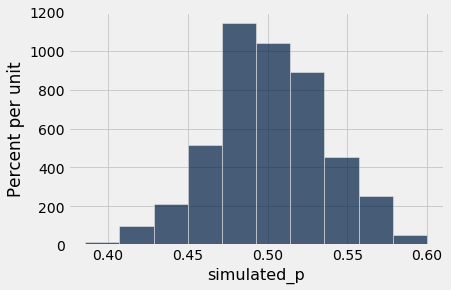

In [36]:
sim_table = Table().with_column('simulated_p', simulated_p) # SOLUTION
# make a histogram below
sim_table.hist('simulated_p') # SOLUTION

**Question 3.4** 

Based on your simulated results and Emily's obeservation (0.44), do you think TT practitioners could interact with a person's HEF? Why?

```
BEGIN QUESTION
name: q34
points: 3
manual: true
```

*Type your answer here*

This case study is an example of a hypothesis test, which is a statistical approach to formally test some hypothesis. In this example, the hypothesis is TT practitioners couldn't interact with a person's HEF. Through simulation and Emily's experiments, we need to find evidence that can reject this hypothesis. We didn't formally define the method but if you're interested, please refer to [chapter 11](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html) in the book!



Congratulations, you're done with this assignment!  Be sure to 
- **save the notebook** first (**`Save and Checkpoint`** from the `File` menu)
- go up to the `Kernel` menu and select `Restart & Clear Output` (make sure the notebook is saved first, because otherwise, you will lose all your work!). 
* go to `Cell -> Run All`. Carefully look through your notebook and verify that all computations execute correctly. You should see **no errors**; if there are any errors, make sure to correct them before you submit the notebook.
* go to `File -> Download as -> Notebook` and download the notebook to your own computer. ([Please verify](https://ucsb-ds.github.io/ds1-f20/troubleshooting/#i-downloaded-the-notebook-file-but-it-saves-as-the-ipynbjson-extension-so-whenever-i-upload-it-to-gradescope-it-fails) that it got saved as an .ipynb file.)
* Upload the notebook to [Gradescope](https://www.gradescope.com/). **If you used additional CSV files, remember to upload them with your notebook.** You can drag and drop both files or hold down Ctrl to click on multiple files when you are uploading them.
